# Statistics for Data Science with Python

## Task 3: Load in the Dataset in your Jupyter Notebook

In [2]:
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Task 4: Generate Descriptive Statistics and Visualizations

### Median value of owner-occupied homes

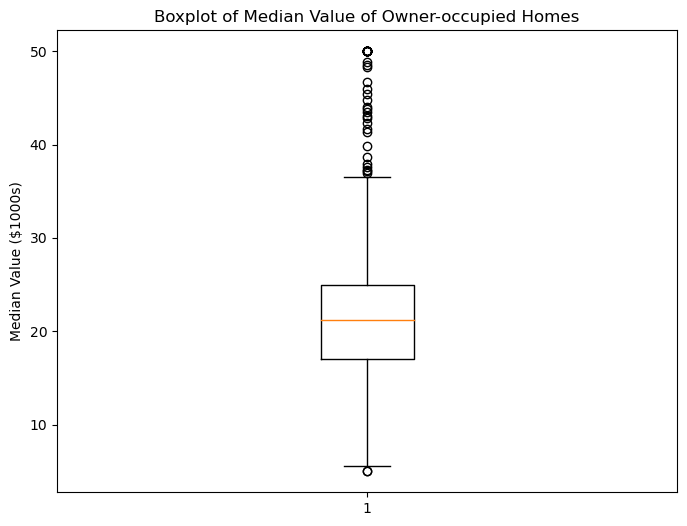

In [6]:
# For the "Median value of owner-occupied homes" provide a boxplot

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-occupied Homes")
plt.ylabel("Median Value ($1000s)")

plt.show()

### A bar plot for the Charles river variable

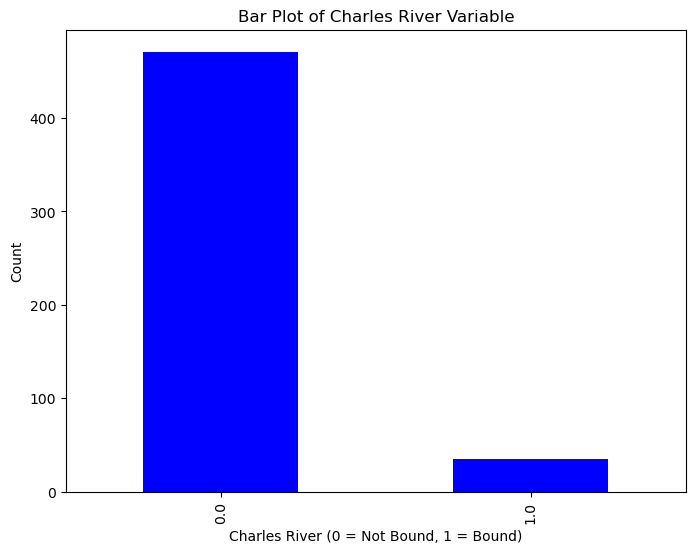

In [7]:
# Provide a bar plot for the Charles river variable

charles_river_counts = boston_df['CHAS'].value_counts()

plt.figure(figsize=(8, 6))
charles_river_counts.plot(kind='bar', color='blue')
plt.title("Bar Plot of Charles River Variable")
plt.xlabel("Charles River (0 = Not Bound, 1 = Bound)")
plt.ylabel("Count")

plt.show()

### A boxplot for the MEDV variable vs the AGE variable

<Figure size 1000x600 with 0 Axes>

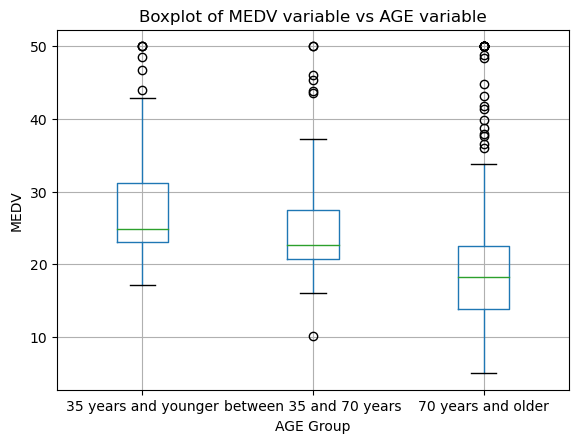

In [8]:
# Provide a boxplot for the MEDV variable vs the AGE variable

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='AGE_group')
plt.title("Boxplot of MEDV variable vs AGE variable")
plt.suptitle("")
plt.xlabel("AGE Group")
plt.ylabel("MEDV")

plt.show()

### A scatter plot of relationship between Nitric oxide concentrations and the proportion of non-retail

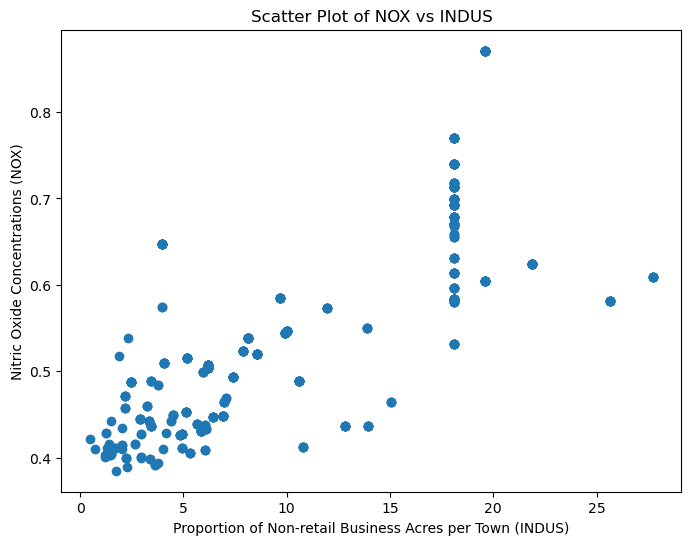

Correlation coefficient between NOX and INDUS: 0.763651446920914


In [10]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title("Scatter Plot of NOX vs INDUS")
plt.xlabel("Proportion of Non-retail Business Acres per Town (INDUS)")
plt.ylabel("Nitric Oxide Concentrations (NOX)")

plt.show()

correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print("Correlation coefficient between NOX and INDUS:", correlation)

A correlation coefficient of 0.77 between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS) suggests a moderately strong positive relationship.

In business terms, this indicates that as the proportion of non-retail business acres per town (INDUS) increases, there is a tendency for nitric oxide concentrations (NOX) to also increase. This positive relationship suggests that areas with a higher proportion of non-retail business acres per town may experience higher levels of nitric oxide concentrations.

### A histogram for the pupil to teacher ratio variable

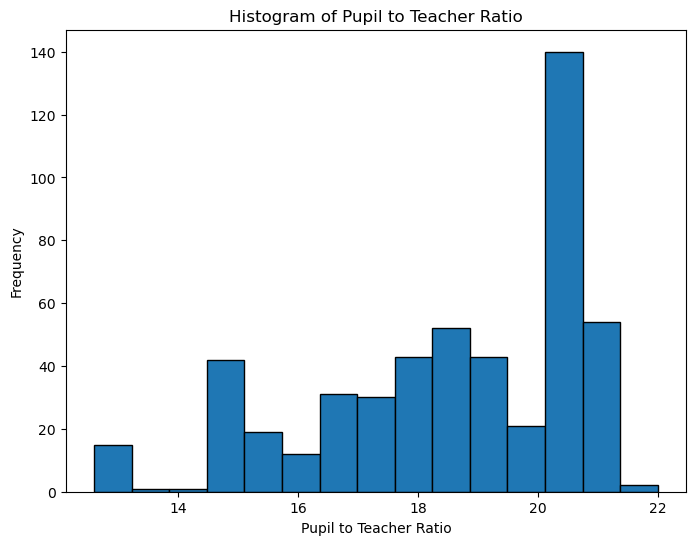

In [11]:
# Create a histogram for the pupil to teacher ratio variable

plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, edgecolor='black')
plt.title("Histogram of Pupil to Teacher Ratio")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Frequency")

plt.show()

## Task 5: Use the appropriate tests to answer the questions provided.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

##### Hypothesis:

Null hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by the river.
Alternative hypothesis (HA): There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the river.

##### Significance level (α):
The given significance level is α = 0.05.

##### Performing the t-test:
Here's the code snippet:

In [12]:
from scipy import stats

bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(bounded, not_bounded)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


##### Conclusion:

We can reject the null hypothesis (H0) and conclude that there is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the river.

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

##### Hypothesis:

Null hypothesis (H0): There is no significant difference in the median values of houses across different proportions of owner-occupied units built prior to 1940 (AGE).
Alternative hypothesis (HA): There is a significant difference in the median values of houses across different proportions of owner-occupied units built prior to 1940 (AGE).

##### Significance level (α):
The given significance level is α = 0.05.

##### Performing the t-test:
Here's the code snippet:

In [13]:
age_groups = []
for _, group in boston_df.groupby(pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100])):
    age_groups.append(group['MEDV'])

f_statistic, p_value = stats.f_oneway(*age_groups)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 36.40764999196599
P-Value: 1.7105011022702984e-15


##### Conclusion:

We can reject the null hypothesis (H0) and conclude that there is a significant difference in the median values of houses across different proportions of owner-occupied units built prior to 1940 (AGE).

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

##### Hypothesis:

Null hypothesis (H0): There is no significant correlation between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
Alternative hypothesis (HA): There is a significant correlation between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

##### Significance level (α):
The given significance level is α = 0.05.

##### Performing the t-test:
Here's the code snippet:

In [14]:
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Correlation coefficient:", correlation)
print("P-Value:", p_value)

Correlation coefficient: 0.7636514469209151
P-Value: 7.913361061238693e-98


##### Conclusion:

We reject the null hypothesis (H0). Thus, we can conclude that there is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

##### Hypothesis:

Null Hypothesis (H0): The additional weighted distance to the five Boston employment centres has no impact on the median value of owner-occupied homes.
Alternative Hypothesis (HA): The additional weighted distance to the five Boston employment centres has an impact on the median value of owner-occupied homes.

##### Significance level (α):
The given significance level is α = 0.05.

##### Performing the t-test:
Here's the code snippet:

In [17]:
import statsmodels.api as sm

y = boston_df['MEDV']
x = boston_df['DIS']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

p_value = model.pvalues[1]

print("P-Value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("The additional weighted distance to the five Boston employment centres has a significant impact on the median value of owner-occupied homes.")
    print("Null hypothesis rejected.")
else:
    print("There is no significant impact of the additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
    print("Null hypothesis cannot be rejected.")

P-Value: 1.2066117273371793e-08
The additional weighted distance to the five Boston employment centres has a significant impact on the median value of owner-occupied homes.
Null hypothesis rejected.


#### Conclusion:

We reject the null hypothesis (H0). Thus, we can conclude that the additional weighted distance to the five Boston employment centres has a significant impact on the median value of owner-occupied homes.